<p></p>
<p style="color:#006699; font-family:'Comic Sans MS'; font-size:20px">Car Price Prediction based on the features</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('CarPrice_Assignment.csv', index_col=0)

In [4]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17
compressionratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

Extract Company name from car name and add as new column to dataset. Then drop 'CarName' column

In [7]:
df['Company Name'] = df['CarName'].apply(lambda x: x.split()[0])

In [8]:
print(df['Company Name'].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [9]:
df['Company Name'] = df['Company Name'].replace({'maxda':'mazda',
                                                 'toyouta':'toyota',
                                                 'porcshce':'porsche',
                                                'Nissan':'nissan',
                                                'vokswagen':'volkswagen',
                                                'vw':'volkswagen'})

In [10]:
df.drop('CarName', axis=1, inplace=True)

<div style="color:#008755">
    <h3>Catagorical Data Analysis</h3>
</div>

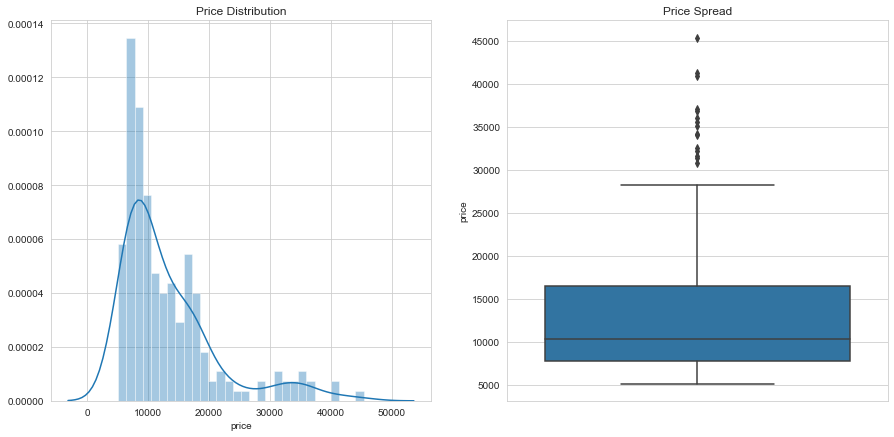

In [11]:
#Plot price distribution
plt.figure(figsize=(15,7))

plt.subplot(1, 2, 1)
plt.title('Price Distribution')
sns.distplot(df['price'], bins=30)

plt.subplot(1, 2, 2)
plt.title('Price Spread')
sns.boxplot(y='price', data=df)

plt.show()

In [12]:
df['price'].describe(percentiles=[0.25,0.50,0.75,0.85,0.90,1])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

<div style="color:#669900">
    <h3>Inference</h3>
    <ol>
        <li>Most of the prices in the datasets are below 15000</li>
        <li>85% of prices are below 18500 and remaining 15% are between 18500 and 45400</li>
        <li>There is significant price different in the mean and standard deviation(median)</li>
    </ol>
</div>

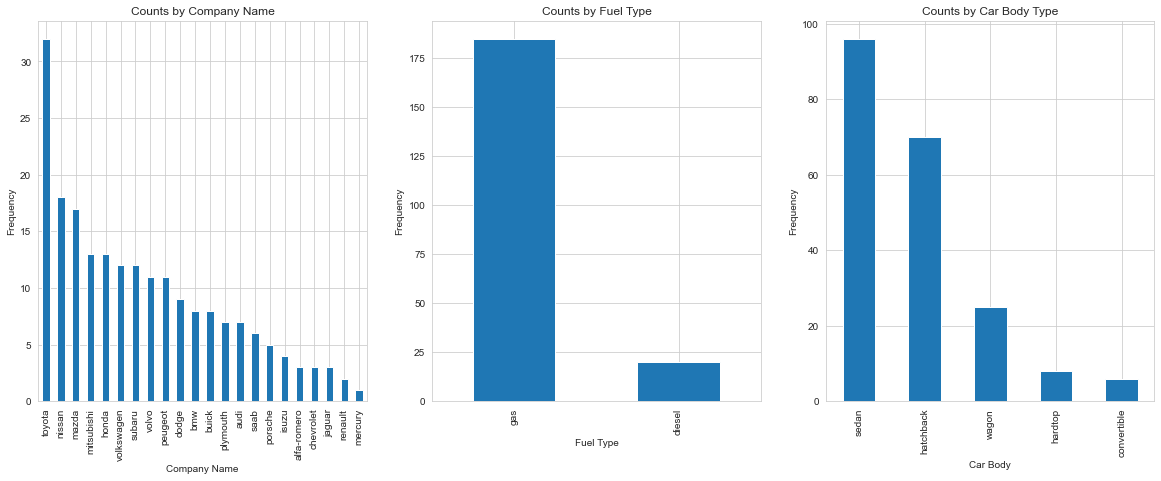

In [13]:
plt.figure(figsize=(20,7))

plt.subplot(1, 3, 1)
plt1 = df['Company Name'].value_counts().plot(kind='bar')
plt1.set(xlabel='Company Name', ylabel='Frequency')
plt.title('Counts by Company Name')

plt.subplot(1, 3, 2)
plt2 = df['fueltype'].value_counts().plot(kind='bar')
plt2.set(xlabel='Fuel Type', ylabel='Frequency')
plt.title('Counts by Fuel Type')

plt.subplot(1, 3, 3)
plt3 = df['carbody'].value_counts().plot(kind='bar')
plt3.set(xlabel='Car Body', ylabel='Frequency')
plt.title('Counts by Car Body Type')

plt.show()

<div style="color:#669900">
    <h3>Inference</h3>
    <ol>
        <li>higher number of Cars are from Toyota company</li>
        <li>gas is the preferred fuel type over diesel</li>
        <li>Sedan is the preferred body type</li>
    </ol>
</div>

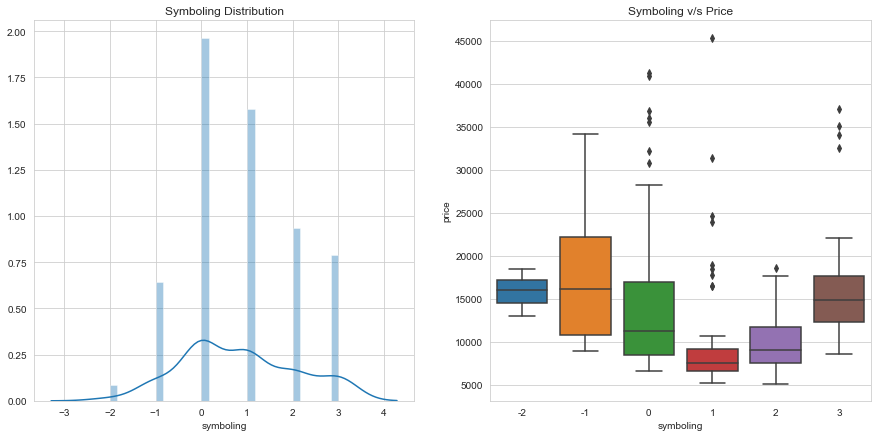

In [14]:
plt.figure(figsize=(15,7))

plt.subplot(1, 2, 1)
plt.title('Symboling Distribution')
sns.distplot(df['symboling'], bins=30)

plt.subplot(1, 2, 2)
plt.title('Symboling v/s Price')
sns.boxplot(x='symboling', y='price', data=df)

plt.show()

<div style="color:#669900">
    <h3>Inference</h3>
    <ol>
        <li>Higher number of vehicles are belongs to 0 and 1.</li>
        <li>Car with symboling -1 have higher priced</li>
        <li>There is a reduction in price for the cars with symboling 1</li>
    </ol>
</div>

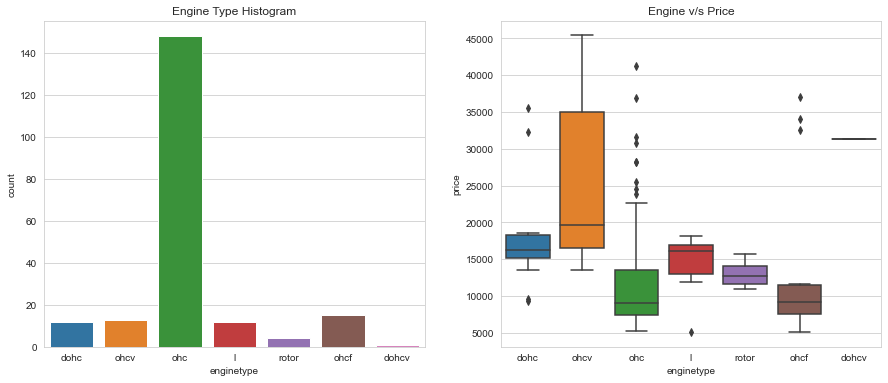

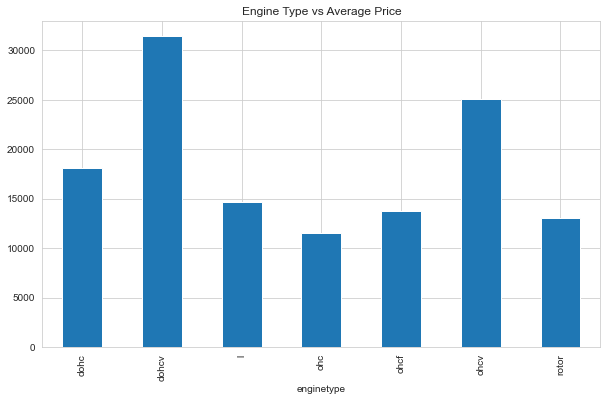

In [26]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.title('Engine Type Histogram')
sns.countplot(df['enginetype'])

plt.subplot(1, 2, 2)
plt.title('Engine v/s Price')
sns.boxplot(x='enginetype', y='price', data=df)

plt.show()

plt.figure(figsize=(10, 6))
plt.title('Engine Type vs Average Price')
df.groupby('enginetype').mean()['price'].plot(kind='bar')

<div style="color:#669900">
    <h3>Inference</h3>
    <ol>
        <li>ohc is the higher number of engine types in given dataset</li>
        <li>ohcv vehicles have higher number of average price</li>
        <li>dohcv vehicle has higher avaerage(but only one in given dataset)</li>
    </ol>
</div>

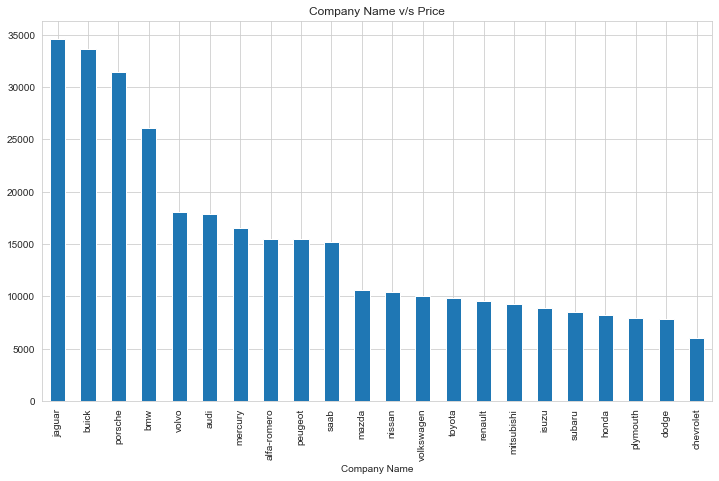

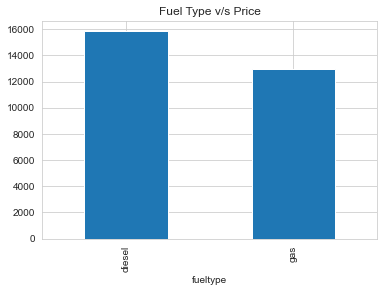

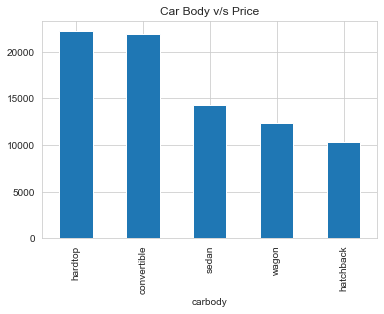

In [35]:
plt.figure(figsize=(12, 7))

group1 = df.groupby('Company Name').mean()['price'].sort_values(ascending=False)
plt.title('Company Name v/s Price')
group1.plot(kind='bar')
plt.show()

group2 = df.groupby('fueltype').mean()['price'].sort_values(ascending=False)
plt.title('Fuel Type v/s Price')
group2.plot(kind='bar')
plt.show()

group2 = df.groupby('carbody').mean()['price'].sort_values(ascending=False)
plt.title('Car Body v/s Price')
group2.plot(kind='bar')
plt.show()

<div style="color:#669900">
    <h3>Inference</h3>
    <ol>
        <li>Jaguar and buick have higher price cars</li>
        <li>Diesel cars have higher price compared to Gas</li>
        <li>hardtop and convertible cars have almost same average prices</li>
    </ol>
</div>

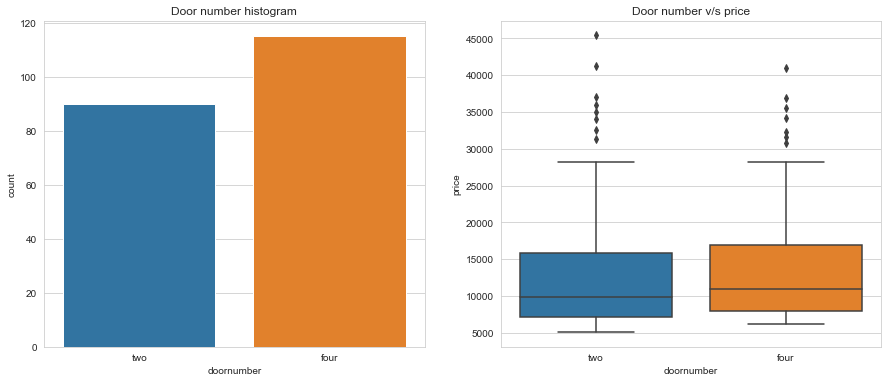

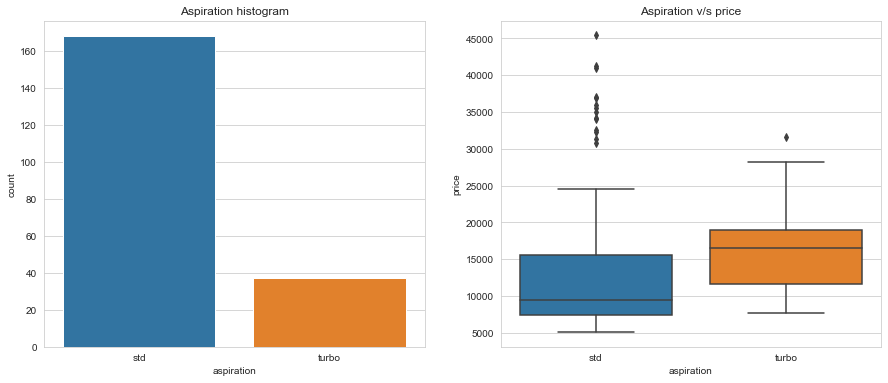

In [42]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.title('Door number histogram')
sns.countplot(df['doornumber'])

plt.subplot(1, 2, 2)
plt.title('Door number v/s price')
sns.boxplot(x='doornumber', y='price', data=df)

plt.show()

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.title('Aspiration histogram')
sns.countplot(df['aspiration'])

plt.subplot(1, 2, 2)
plt.title('Aspiration v/s price')
sns.boxplot(x='aspiration', y='price', data=df)

plt.show()

<div style="color:#669900">
    <h3>Inference</h3>
    <ol>
        <li>Door number does not affecting price too much</li>
        <li>More number of car have aspiraion type is 'std'</li>
        <li>Aspiration type 'turbo' has higher price</li>
    </ol>
</div>

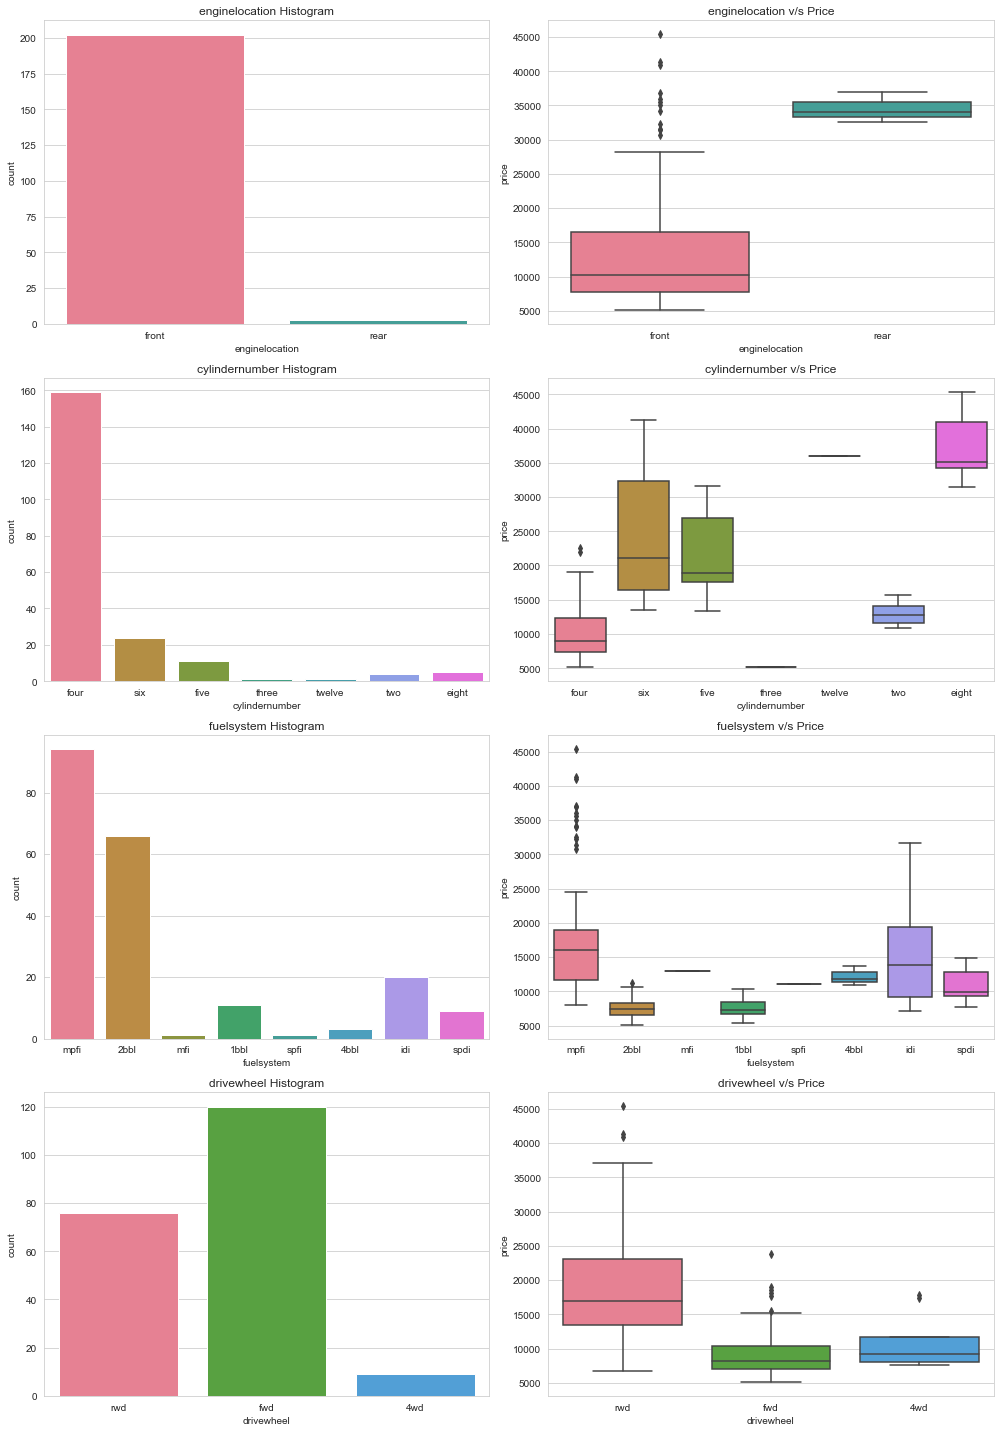

In [62]:
def plotCount(feature, row):
    plt.subplot(4, 2, row)
    plt.title(feature + ' Histogram')
    sns.countplot(df[feature], palette='husl')
    
    plt.subplot(4, 2, row+1)
    plt.title(feature + ' v/s Price')
    sns.boxplot(x=feature, y='price', data=df, palette='husl')

plt.figure(figsize=(14, 20))
plotCount('enginelocation', 1)
plotCount('cylindernumber', 3)
plotCount('fuelsystem', 5)
plotCount('drivewheel', 7)

plt.tight_layout()

<div style="color:#669900">
    <h3>Inference</h3>
    <ol>
        <li>Feature enginelocation has few datapoints to make an inference</li>
        <li>most common vehicles have four, six and five cylinders. The vehicle with eight cylinders have higher prices</li>
        <li>mpfi and 2bbl are the more common types of fuel systems</li>
        <li>fwd is common drivewheel type and price is higher too</li>
    </ol>
</div>

<div style="color:#008755">
    <h3>Visualizing Numerical Data</h3>
</div>

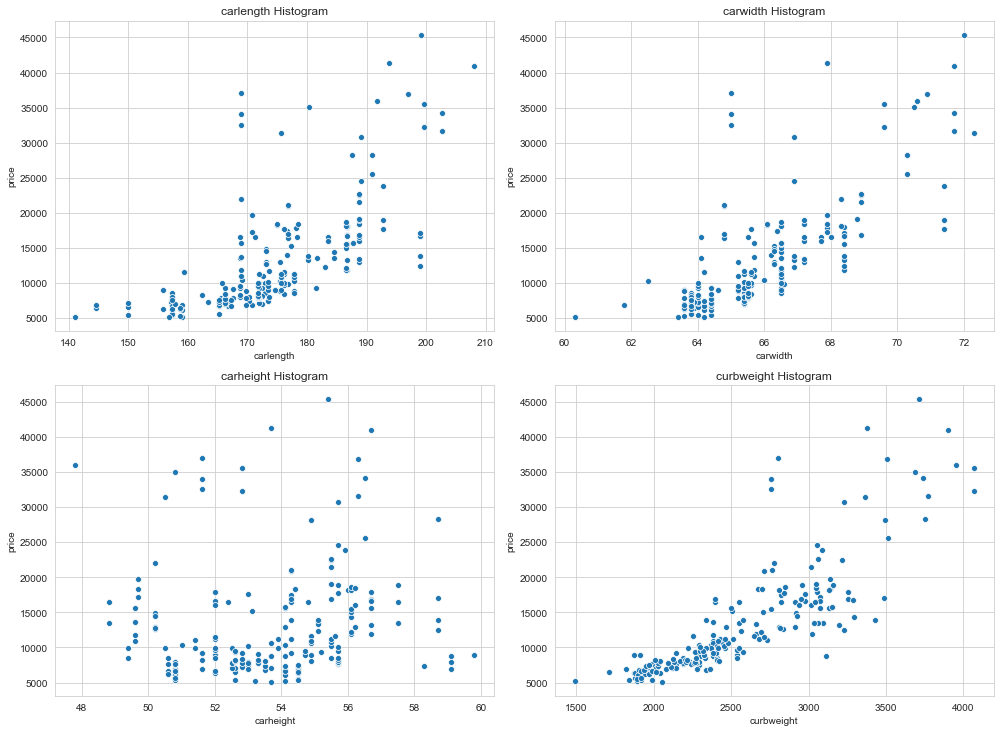

In [61]:
def plotScatter(feature, row):
    plt.subplot(4, 2, row)
    plt.title(feature + ' Histogram')
    sns.scatterplot(x=feature, y='price', data=df, palette='husl')


plt.figure(figsize=(14, 20))
plotScatter('carlength', 1)
plotScatter('carwidth', 2)
plotScatter('carheight', 3)
plotScatter('curbweight', 4)

plt.tight_layout()

<div style="color:#669900">
    <h3>Inference</h3>
    <ol>
        <li>carlength, carwidth and curbweight have positive correlation with price</li>
    </ol>
</div>

Deriving New features

In [63]:
df['Fuel Economy'] = (0.55 * df['citympg']) + (0.45 * df['highwaympg'])

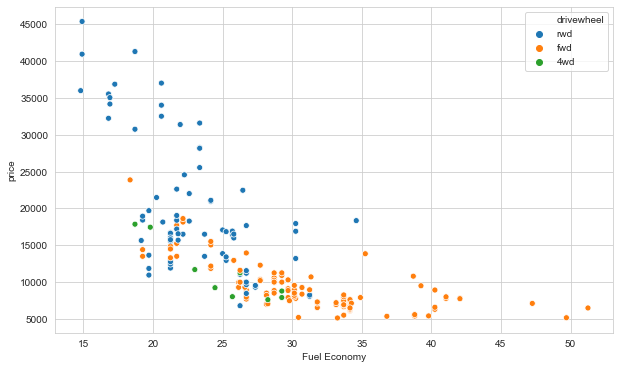

In [67]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Fuel Economy', y='price', data=df, hue='drivewheel')

In [72]:
df['price'] = df['price'].astype(int)
temp = df.copy()
table = temp.groupby('Company Name').mean()['price']
temp = temp.merge(table.reset_index(), how='left', on='Company Name')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
df['carsrange'] = pd.cut(temp['price_y'], bins, right=False, labels=cars_bin)

In [82]:
df.head(5)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company Name,Fuel Economy,carsrange
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2.68,9.0,111,5000,21,27,13495,alfa-romero,23.70,Medium
2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2.68,9.0,111,5000,21,27,16500,alfa-romero,23.70,Medium
3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,3.47,9.0,154,5000,19,26,16500,alfa-romero,22.15,Medium
4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,3.40,10.0,102,5500,24,30,13950,audi,26.70,Medium
5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,3.40,8.0,115,5500,18,22,17450,audi,19.80,Medium


<div style="color:#008755">
    <h3>Select the feature having significant inference on prices</h3>
</div>

In [85]:
cars_lr = df[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'Fuel Economy', 'carlength','carwidth', 'carsrange']]

In [86]:
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,Fuel Economy,carlength,carwidth,carsrange
car_ID,,,,,,,,,,,,,,,,
1,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
3,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
4,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
5,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


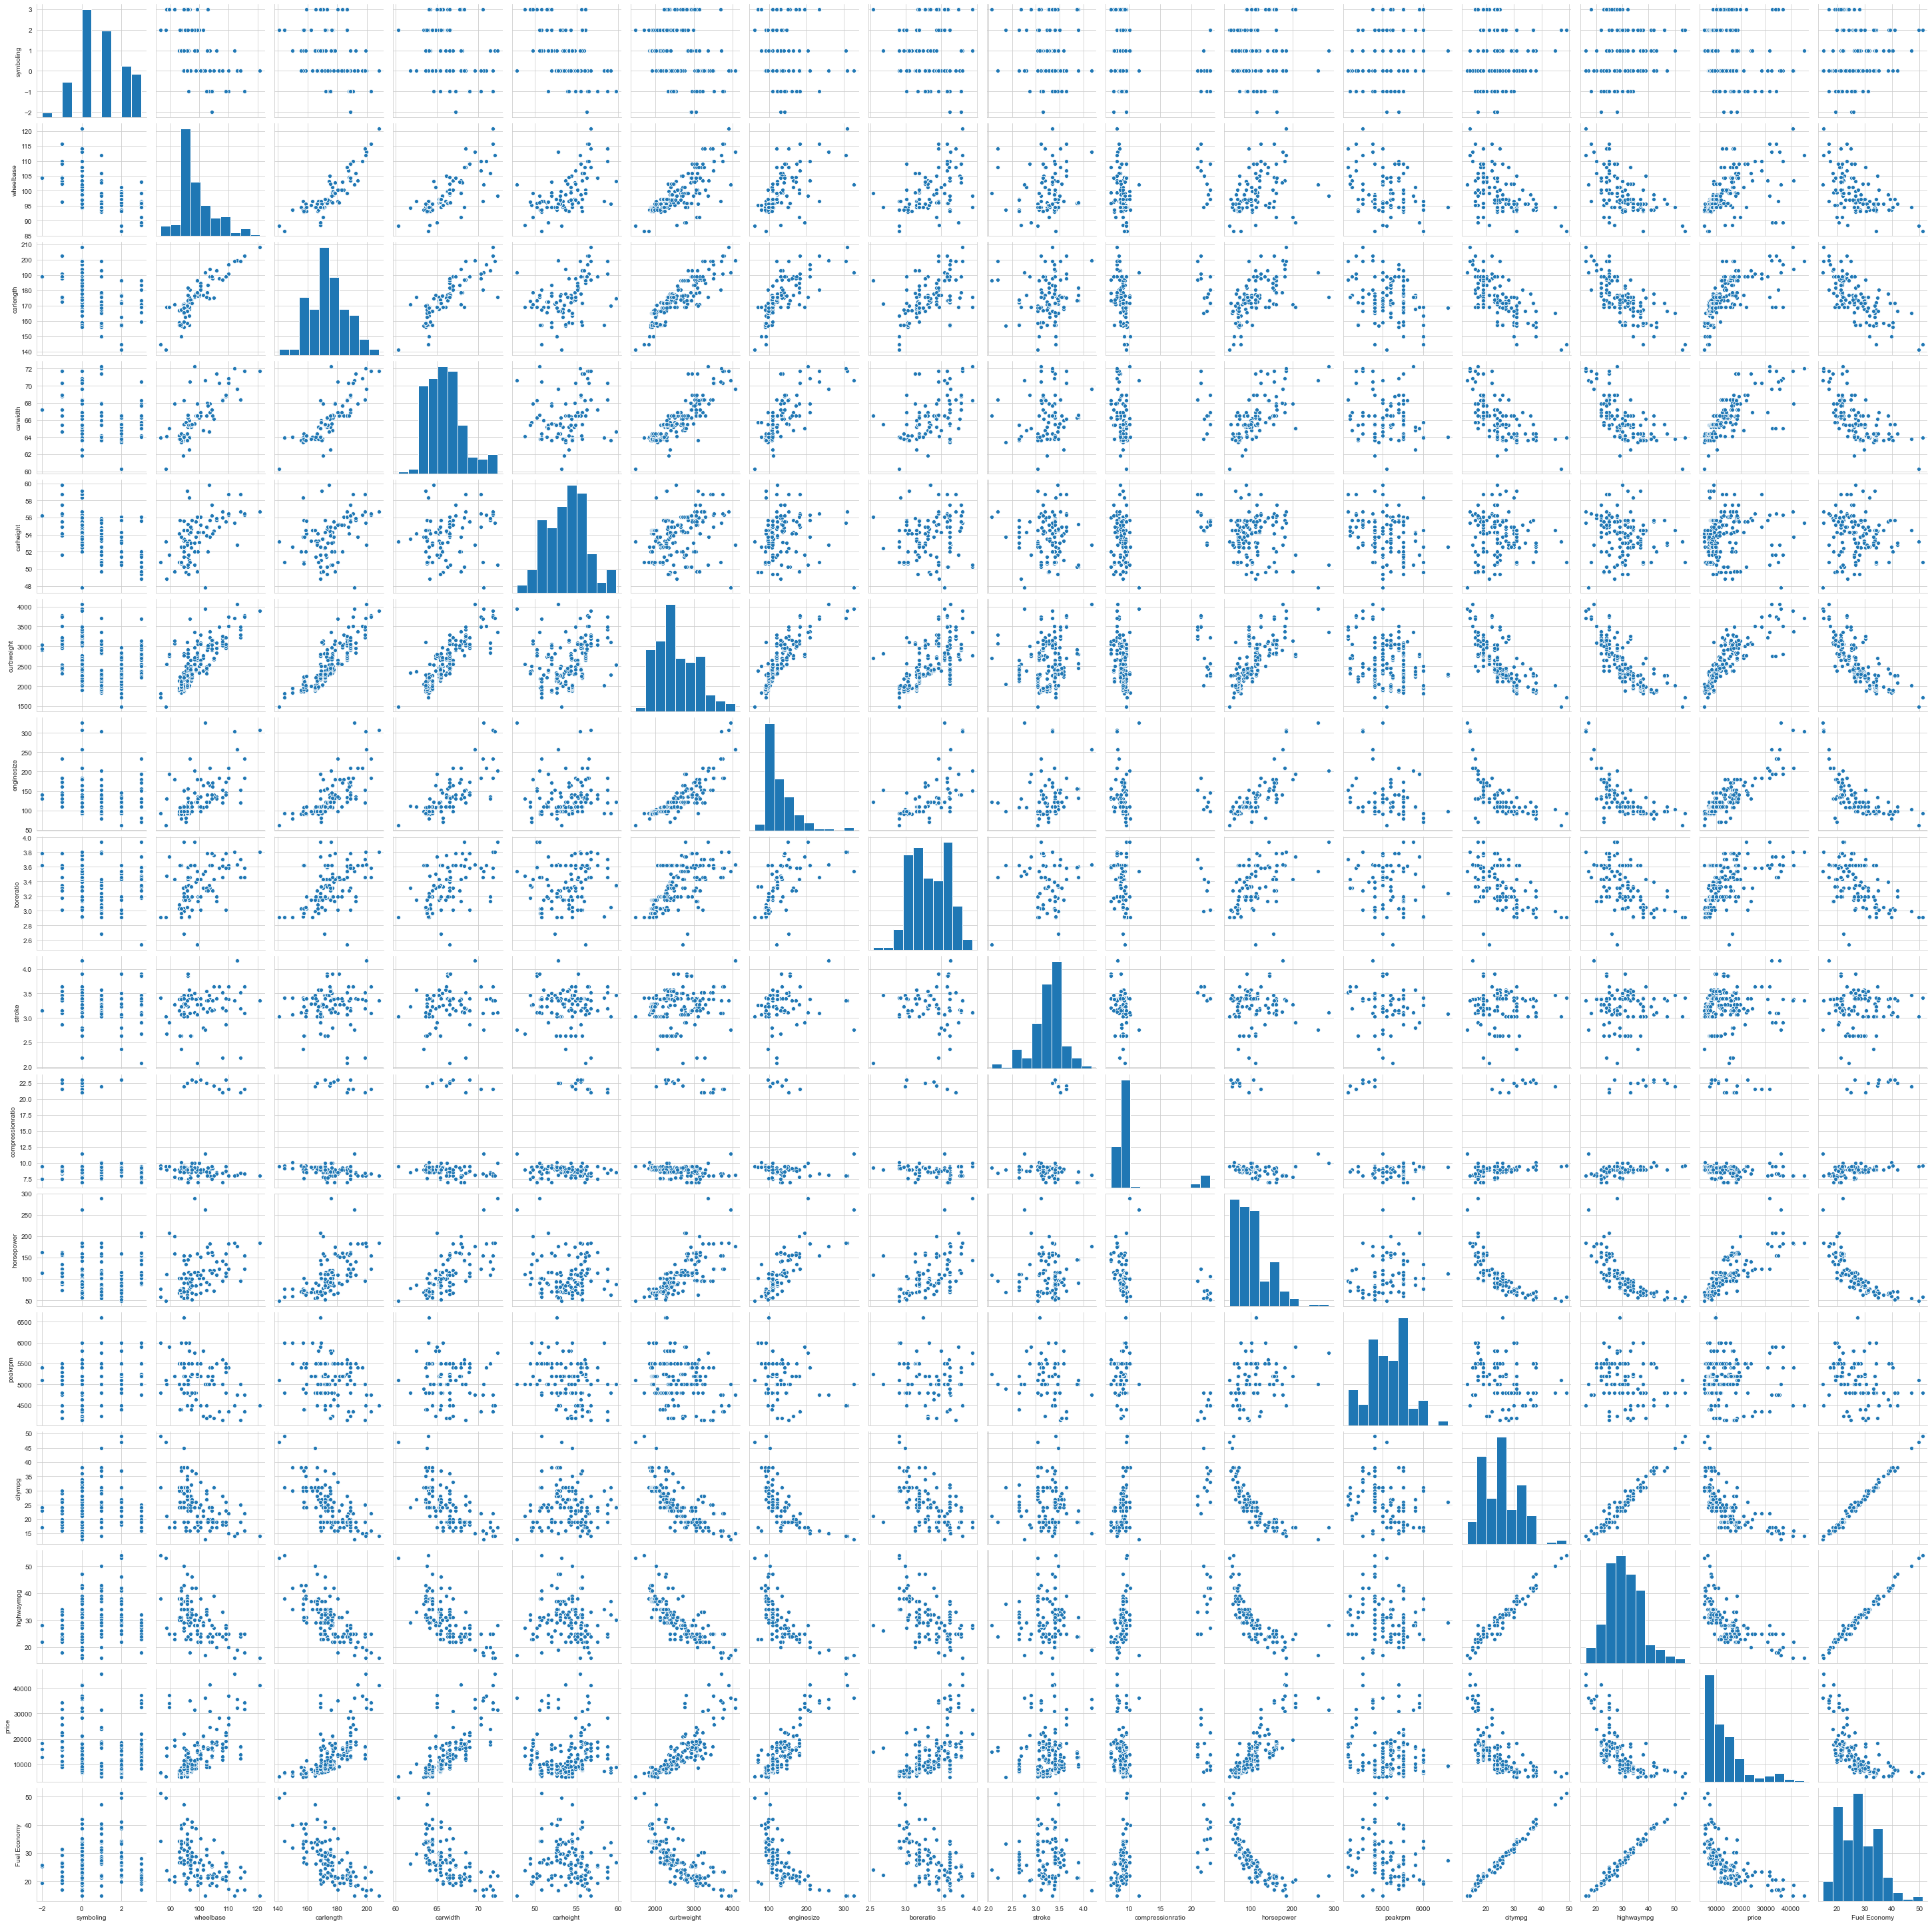

In [87]:
sns.pairplot(df)

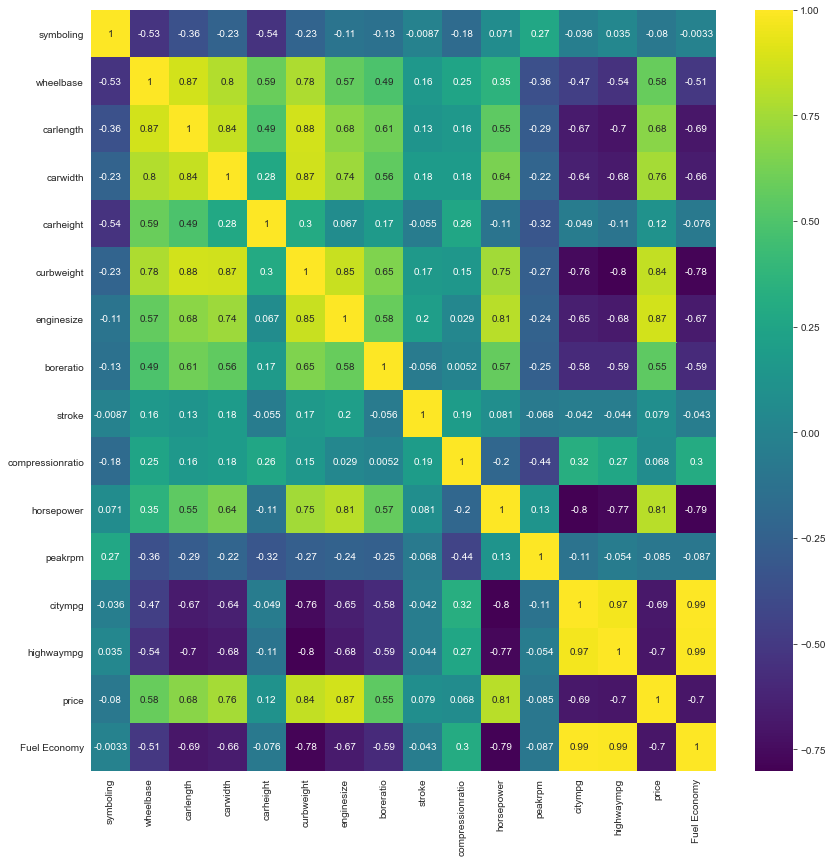

In [91]:
plt.figure(figsize=(14, 14))
sns.heatmap(df.corr(), cmap='viridis', annot=True)

<div style="color:#008755">
    <h3>Convert Categorical features to dummy variables</h3>
</div>

In [99]:
def dummies(x, df):
    temp = pd.get_dummies(df[x], drop_first=True)
    df = pd.concat([df, temp], axis=1)
    df.drop(x, axis=1, inplace=True)
    return df

cars_lr = dummies('fueltype', cars_lr)
cars_lr = dummies('aspiration', cars_lr)
cars_lr = dummies('carbody', cars_lr)
cars_lr = dummies('drivewheel', cars_lr)
cars_lr = dummies('cylindernumber', cars_lr)
cars_lr = dummies('enginetype', cars_lr)
cars_lr = dummies('carsrange', cars_lr)

In [100]:
cars_lr.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,Fuel Economy,carlength,carwidth,gas,...,twelve,two,dohcv,l,ohc,ohcf,ohcv,rotor,Medium,Highend
car_ID,,,,,,,,,,,,,,,,,,,,,
1,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,0,0,0,0,0,1,0
2,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,0,0,0,0,0,1,0
3,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,...,0,0,0,0,0,0,1,0,1,0
4,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,...,0,0,0,0,1,0,0,0,1,0
5,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,...,0,0,0,0,1,0,0,0,1,0


<div style="color:#008755">
    <h3>Train and test data split</h3>
</div>

In [92]:
from sklearn.model_selection import train_test_split

In [101]:
X = cars_lr.drop('price', axis=1)
y= cars_lr['price']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

<div style="color:#008755">
    <h3>Feature Scaling</h3>
</div>

In [95]:
from sklearn.preprocessing import MinMaxScaler

In [103]:
scaler = MinMaxScaler()

In [104]:
X_train = scaler.fit_transform(X_train)

In [105]:
X_test = scaler.transform(X_test)

<div style="color:#008755">
    <h3>Model building</h3>
</div>

In [106]:
from sklearn.linear_model import LinearRegression

In [107]:
model = LinearRegression()

In [108]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [121]:
coef = pd.DataFrame(model.coef_, X.columns, columns=['Coefs'])

In [122]:
coef

,Coefs
wheelbase,5.585912e+03
curbweight,3.592995e+03
enginesize,-6.369333e+03
boreratio,-4.809040e+02
horsepower,2.764315e+04
Fuel Economy,5.617009e+03
carlength,1.684315e+03
carwidth,6.537568e+03
gas,-1.639826e+03
turbo,-1.030282e+03


In [123]:
predictions = model.predict(X_test)

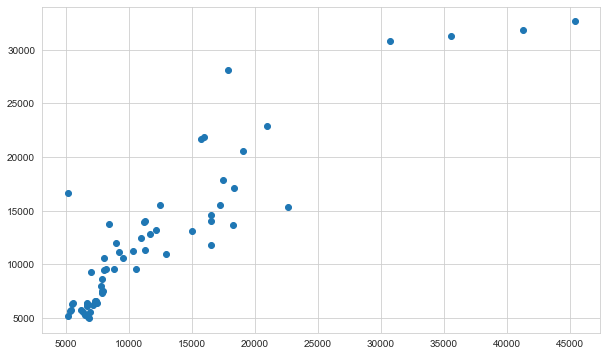

In [124]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)

In [125]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [127]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=10)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=10, step=1, verbose=0)